In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pymongo

/var/folders/f_/wp8d4zkn51lf_q_66klhkb9r0000gn/T/ipykernel_8872/1008334731.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
MONGO_CLIENT = pymongo.MongoClient("mongodb://192.168.1.7:27017/")
SDA_DB = MONGO_CLIENT["steam_dota_api"]
MLRS_COL = SDA_DB["multi_real_time_stats"]

In [3]:
matches_for_pd = []

Getting data from old collection

In [4]:
steam_dota_api_db = MONGO_CLIENT["steam_dota_api"]
stats_with_win_col = steam_dota_api_db["stats_with_win"]

for entry in stats_with_win_col.find():
    tmp = {}

    tmp["timestamp"] = entry["match"]["timestamp"]
    tmp["game_time"] = entry["match"]["game_time"]

    tmp['score'] = entry["teams"][0]["score"] - entry["teams"][1]["score"]
    tmp['net_worth'] = entry["teams"][0]["net_worth"] - entry["teams"][1]["net_worth"]

    for team in entry["teams"]:
        for p_idx, player in enumerate(team["players"]):
            # tmp["team_{}_player_{}_heroid".format(team["team_number"], p_idx)] = player['heroid']
            tmp["team_{}_player_{}_level".format(team["team_number"], p_idx)] = player['level']
            tmp["team_{}_player_{}_kill_count".format(team["team_number"], p_idx)] = player['kill_count']
            tmp["team_{}_player_{}_death_count".format(team["team_number"], p_idx)] = player['death_count']
            tmp["team_{}_player_{}_assists_count".format(team["team_number"], p_idx)] = player['assists_count']
            tmp["team_{}_player_{}_denies_count".format(team["team_number"], p_idx)] = player['denies_count']
            tmp["team_{}_player_{}_lh_count".format(team["team_number"], p_idx)] = player['lh_count']
            tmp["team_{}_player_{}_gold".format(team["team_number"], p_idx)] = player['gold']
            tmp["team_{}_player_{}_net_worth".format(team["team_number"], p_idx)] = player['net_worth']

            for i_idx, item in enumerate(player['items']):
                tmp["team_{}_player_{}_item_{}".format(team["team_number"], p_idx, i_idx)] = item

    for gg_idx, graph_gold in enumerate(entry['graph_data']['graph_gold']):
        tmp['graph_gold_{}'.format(gg_idx)] = graph_gold

    for i, building in enumerate(entry["buildings"]):
            tmp["building_{}".format(i)] = int(building["destroyed"])

    tmp["winner"] = entry["winner"]

    matches_for_pd.append(tmp)

Getting data from main collection

In [5]:
matches = MLRS_COL.find({"match.winner": {"$exists": True}})

for entry in matches:
    try:
        tmp = {}

        tmp["timestamp"] = entry["match"]["timestamp"]
        tmp["game_time"] = entry["match"]["game_time"]

        tmp['score'] = entry["teams"][0]["score"] - entry["teams"][1]["score"]
        tmp['net_worth'] = entry["teams"][0]["net_worth"] - entry["teams"][1]["net_worth"]

        for team in entry["teams"]:
            for p_idx, player in enumerate(team["players"]):
                # tmp["team_{}_player_{}_heroid".format(team["team_number"], p_idx)] = player['heroid']
                tmp["team_{}_player_{}_level".format(team["team_number"], p_idx)] = player['level']
                tmp["team_{}_player_{}_kill_count".format(team["team_number"], p_idx)] = player['kill_count']
                tmp["team_{}_player_{}_death_count".format(team["team_number"], p_idx)] = player['death_count']
                tmp["team_{}_player_{}_assists_count".format(team["team_number"], p_idx)] = player['assists_count']
                tmp["team_{}_player_{}_denies_count".format(team["team_number"], p_idx)] = player['denies_count']
                tmp["team_{}_player_{}_lh_count".format(team["team_number"], p_idx)] = player['lh_count']
                tmp["team_{}_player_{}_gold".format(team["team_number"], p_idx)] = player['gold']
                tmp["team_{}_player_{}_net_worth".format(team["team_number"], p_idx)] = player['net_worth']

                for i_idx, item in enumerate(player['items']):
                    tmp["team_{}_player_{}_item_{}".format(team["team_number"], p_idx, i_idx)] = item

        for gg_idx, graph_gold in enumerate(entry['graph_data']['graph_gold']):
            tmp['graph_gold_{}'.format(gg_idx)] = graph_gold

        for i, building in enumerate(entry["buildings"]):
            tmp["building_{}".format(i)] = int(building["destroyed"])

        tmp["winner"] = entry["match"]["winner"]

        matches_for_pd.append(tmp)
    except Exception as e:
        print(e, entry['match']['match_id'])

'items' 7539763194
'items' 7539765540
'items' 7539763194
'items' 7539765540
'items' 7539773881
'items' 7539763194
'items' 7539765540
'items' 7539773881
'items' 7539763194
'items' 7539775951
'items' 7539763194
'items' 7539777875
'items' 7539778590
'items' 7539763194
'items' 7539769586
'items' 7539778590
'items' 7539763194
'items' 7539769586
'items' 7539763194
'items' 7539769586
'items' 7539769586
'items' 7539769586
'items' 7539769586
'items' 7539785727
'items' 7539769586
'items' 7539785727
'items' 7539787978
'items' 7539788502
'items' 7540300842
'items' 7540302951
'items' 7540302951
'items' 7540302951
'items' 7540309060
'items' 7540309065
'items' 7540309060
'items' 7540309065
'items' 7540316674
'items' 7540316674
'items' 7540319453
'items' 7540321119
'items' 7540300675
'items' 7540300675
'items' 7540300675
'items' 7540300675
'items' 7540300675
'items' 7540331866
'items' 7540300675
'items' 7540331866
'items' 7540336013
'items' 7540300675
'items' 7540331866
'items' 7540336013
'items' 7540

In [6]:
df = pd.DataFrame(matches_for_pd)
df.shape

(33847, 339)

In [7]:
df.to_csv(f'{df.shape[0]}x{df.shape[1]}_samples.csv', index=False)

In [8]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

for i, winner in enumerate(le.classes_):
    print(i, '=', winner)

0 = dire
1 = radiant


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [11]:
results = []

Gini

In [12]:
criterion = 'gini'

gini_classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
gini_classifier.fit(X_train, y_train)
y_pred = gini_classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'CART',
    'criterion': criterion,
    'accuracy_score': acc
    })

0.7586410635155096


Entropy

In [13]:
criterion = 'entropy'

entropy_classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
entropy_classifier.fit(X_train, y_train)
y_pred = entropy_classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'C4.5',
    'criterion': criterion,
    'accuracy_score': acc
    })

0.7580502215657312


Extra Tree Classifier

In [14]:
etc_results = []

et_classifier = ExtraTreesClassifier(criterion='entropy', n_estimators=150, random_state=1)
et_classifier.fit(X_train, y_train)
y_pred = et_classifier.predict(X_test)
etc_results.append({
    'criterion': 'entropy',
    'n_estimators': 150, 
    'accuracy_score': accuracy_score(y_test, y_pred)})

result = max(etc_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Extra Trees Classifier'
results.append(result)

0.8528803545051699


Gradient boosting

In [15]:
gb_results = []

gb_classifier = GradientBoostingClassifier(loss='log_loss', n_estimators=50, learning_rate=1, criterion='friedman_mse', max_depth=4, random_state=1)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
gb_results.append({
    'loss': 'log_loss',
    'learning_rate': 1,
    'n_estimators': 50,
    'criterion': 'friedman_mse',
    'max_depth': 4,
    'accuracy_score': accuracy_score(y_test, y_pred)
})

result = max(gb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Gradient Boosting'
results.append(result)

0.8121122599704579


Hist Gradient Boosting

In [16]:
hgb_results = []

hgb_classifier = HistGradientBoostingClassifier(learning_rate=0.2, max_iter=100, random_state=1)
hgb_classifier.fit(X_train, y_train)
y_pred = hgb_classifier.predict(X_test)
hgb_results.append({
    'learning_rate': 0.2,
    'max_iter': 100,
    'accuracy_score': accuracy_score(y_test, y_pred)
})

result = max(hgb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Hist Gradient Boosting'
results.append(result)

0.8797636632200886


Random Forest

In [17]:
rf_results = []

rf_classifier = RandomForestClassifier(n_estimators=50, criterion='gini', random_state=1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
rf_results.append({
    'n_estimators': 50,
    'criterion': 'gini',
    'accuracy_score': accuracy_score(y_test, y_pred)
})

result = max(rf_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Random Forest'
results.append(result)

0.8118168389955687


Ada Boost

In [18]:
ada_results = []

ab_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, algorithm='SAMME.R', random_state=0)
ab_classifier.fit(X_train, y_train)
y_pred = ab_classifier.predict(X_test)
ada_results.append({
    'n_estimators': 50,
    'learning_rate': 0.1,
    'algorithm': 'SAMME.R',
    'accuracy_score': accuracy_score(y_test, y_pred)
})

result = max(ada_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Adaboost'
results.append(result)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.6933530280649927


Printing results

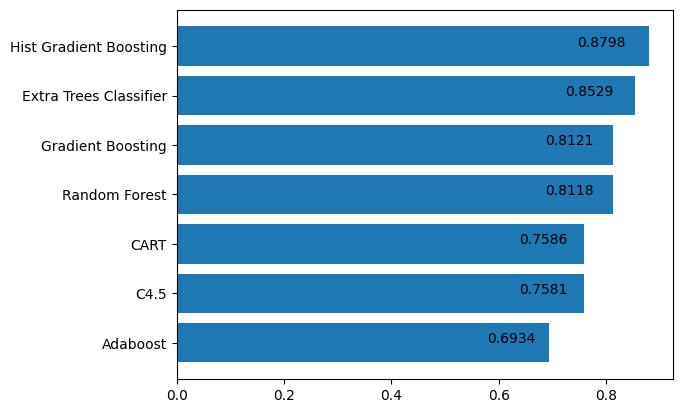

In [19]:
plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame(results)

df_sorted = df.sort_values('accuracy_score')

ax.barh('classifier', 'accuracy_score', data=df_sorted)
for i in range(len(results)):
    ax.text(results[i]['accuracy_score'] * 0.9, results[i]['classifier'], round(results[i]['accuracy_score'], 4), ha='center', color='black')


# Saving models

In [20]:
import pickle

with open('et_classifier.pkl','wb') as f:
    pickle.dump(et_classifier, f)
with open('gb_classifier.pkl','wb') as f:
    pickle.dump(gb_classifier, f)
with open('hgb_classifier.pkl','wb') as f:
    pickle.dump(hgb_classifier, f)
with open('rf_classifier.pkl','wb') as f:
    pickle.dump(rf_classifier, f)
with open('ab_classifier.pkl','wb') as f:
    pickle.dump(ab_classifier, f)

In [21]:
# y_pred = hgb_classifier.predict_proba(X_test)
# y_pred